# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:

# from sklearn.metrics import classification_report
# def evaluate_model(model, X_test, Y_test, category_names):
#     print(classification_report(y_pred=model.predict(X_test), y_true=Y_test, target_names=category_names))
#     pass
# evaluate_model(model, X_test, Y_test, category_names)

In [6]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine

In [7]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [8]:
# load data from database
engine = create_engine('sqlite:///./data/Disaster_response.db')
df = pd.read_sql_query("SELECT * FROM response_message", engine)
print(df.shape)
print('=='*40)
print(df.head(2))
X = df['message']
Y = df[df.columns[4:]]

OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [ ]:
# To know whether one belong to one category or multiple cats
df.iloc[:,4:].sum(axis=1).head(10)

0    1
1    5
2    1
3    8
4    1
5    0
6    3
7    6
8    0
9    6
dtype: int64

### 2. Write a tokenization function to process your text data

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\racha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\racha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\racha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\racha\AppData\Roaming\nltk_data...


True

In [ ]:
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [ ]:
def tokenize(text, to_print=False):
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    orig_text = text
    text = re.sub('[^A-Za-z0-9]',' ', text)
    text = text.lower()
    tok_texts = word_tokenize(text) 
    text = [stemmer.stem(lemmatizer.lemmatize(w.strip())) for w in tok_texts if w.strip() not in stopwords.words('english')]
    if to_print==True:
        print(tok_texts)
#         print(text)
    return text

In [ ]:
X[0]

'Weather update - a cold front from Cuba that could pass over Haiti'

In [ ]:
print(X[0])
print("=="*40)
print(tokenize(X[0], to_print=True))

Weather update - a cold front from Cuba that could pass over Haiti
['weather', 'update', 'a', 'cold', 'front', 'from', 'cuba', 'that', 'could', 'pass', 'over', 'haiti']
['weather', 'updat', 'cold', 'front', 'cuba', 'could', 'pa', 'haiti']


### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
pipeline = Pipeline(steps=[
                   ('tfidf', TfidfVectorizer(tokenizer=tokenize)),
                   ('clf', MultiOutputClassifier(RandomForestClassifier()))
])

In [ ]:
pipeline.get_params()

{'memory': None,
 'steps': [('tfidf',
   TfidfVectorizer(tokenizer=<function tokenize at 0x0000021853821798>)),
  ('clf', MultiOutputClassifier(estimator=RandomForestClassifier()))],
 'verbose': False,
 'tfidf': TfidfVectorizer(tokenizer=<function tokenize at 0x0000021853821798>),
 'clf': MultiOutputClassifier(estimator=RandomForestClassifier()),
 'tfidf__analyzer': 'word',
 'tfidf__binary': False,
 'tfidf__decode_error': 'strict',
 'tfidf__dtype': numpy.float64,
 'tfidf__encoding': 'utf-8',
 'tfidf__input': 'content',
 'tfidf__lowercase': True,
 'tfidf__max_df': 1.0,
 'tfidf__max_features': None,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 1),
 'tfidf__norm': 'l2',
 'tfidf__preprocessor': None,
 'tfidf__smooth_idf': True,
 'tfidf__stop_words': None,
 'tfidf__strip_accents': None,
 'tfidf__sublinear_tf': False,
 'tfidf__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidf__tokenizer': <function __main__.tokenize(text, to_print=False)>,
 'tfidf__use_idf': True,
 'tfidf__vocabulary': None,
 

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
Y.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y.describe()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
count,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.0,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000
mean,0.773650,0.170659,0.004501,0.414251,0.079493,0.050084,0.027617,0.017966,0.032804,0.0,0.063778,0.111497,0.088267,0.015449,0.023039,0.011367,0.033377,0.045545,0.131446,0.065037,0.045812,0.050847,0.020293,0.006065,0.010795,0.004577,0.011787,0.043904,0.278341,0.082202,0.093187,0.010757,0.093645,0.020217,0.052487,0.193584
std,0.435276,0.376218,0.066940,0.492602,0.270513,0.218122,0.163875,0.132831,0.178128,0.0,0.244361,0.314752,0.283688,0.123331,0.150031,0.106011,0.179621,0.208500,0.337894,0.246595,0.209081,0.219689,0.141003,0.077643,0.103338,0.067502,0.107927,0.204887,0.448191,0.274677,0.290700,0.103158,0.291340,0.140743,0.223011,0.395114
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Y['related'] = np.where(Y['related']==2, 1,Y['related'])

c:\Users\racha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.1)

NameError: name 'train_test_split' is not defined

In [29]:
print(X_train.shape[0])
print(X_test.shape[0])

23594
2622


In [30]:
# related column have some value show 2 which should be one instead
Y[Y['related']==2]

# this is already cleared

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report


In [31]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

KeyboardInterrupt: 

In [ ]:
predicted_df = pd.DataFrame(y_pred, columns=y_train.columns)
predicted_df.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5,1,'Multiclasses distribution')

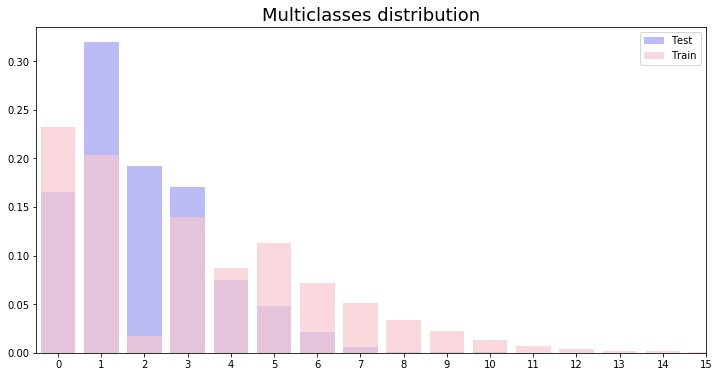

In [ ]:
fig,ax = plt.subplots(1)
fig.set_size_inches(12,6)
sns.barplot(
    x=(predicted_df.sum(axis=1).value_counts()/predicted_df.shape[0]).sort_index().index, 
    y=(predicted_df.sum(axis=1).value_counts()/predicted_df.shape[0]).sort_index(), 
    ax=ax, color='Blue', alpha=0.3, label='Test')
sns.barplot(
    x=(y_train.sum(axis=1).value_counts()/predicted_df.shape[0]).sort_index().index, 
    y=(y_train.sum(axis=1).value_counts()/y_train.shape[0]).sort_index(), 
    ax=ax, color='Pink',alpha=0.7, label='Train')
ax.legend()
ax.set_xlim(-0.5,15)
ax.set_title('Multiclasses distribution', fontsize=18)

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_test.iloc[:,0].value_counts()

1    2008
0     631
Name: related, dtype: int64

In [ ]:
# Checking how classification_report work
print(classification_report(y_true=y_test ,y_pred=y_pred, target_names=y_test.columns))

                        precision    recall  f1-score   support

               related       0.85      0.92      0.88      2008
               request       0.84      0.45      0.59       470
                 offer       1.00      0.06      0.12        16
           aid_related       0.77      0.63      0.69      1106
          medical_help       0.49      0.09      0.15       219
      medical_products       0.74      0.10      0.18       140
     search_and_rescue       0.88      0.07      0.13        97
              security       0.25      0.01      0.03        67
              military       0.60      0.06      0.10       107
           child_alone       0.00      0.00      0.00         0
                 water       0.91      0.36      0.52       194
                  food       0.83      0.59      0.69       293
               shelter       0.77      0.30      0.43       248
              clothing       0.62      0.23      0.33        35
                 money       0.00      

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### 6. Improve your model
Use grid search to find better parameters. 

In [ ]:
pipeline.get_params()

{'memory': None,
 'steps': [('tfidf',
   TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
           stop_words=None, strip_accents=None, sublinear_tf=False,
           token_pattern='(?u)\\b\\w\\w+\\b',
           tokenizer=<function tokenize at 0x7f161d899f28>, use_idf=True,
           vocabulary=None)),
  ('clf',
   MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
               max_depth=None, max_features='auto', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
               oob_score=False, random_state=None, verbose=0,

In [ ]:
parameters = {
#     'tfidf__ngram_range':(1,1),
             'clf__estimator__min_samples_leaf':[1,2], 
             'clf__estimator__min_samples_split':[2,3]}
# cv = GridSearchCV(pipeline, param_grid=parameters)
cv = GridSearchCV(pipeline, param_grid=parameters)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [ ]:
cv.fit(X_train, y_train)
y_pred_new = cv.predict(X_test)

In [ ]:
print(classification_report(y_true=y_test ,y_pred=y_pred_new, target_names=y_test.columns))

In [ ]:
cv.best_params_

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
pipeline2 = Pipeline(steps=[
                   ('tfidf', TfidfVectorizer(tokenizer=tokenize)),
                   ('clf', MultiOutputClassifier(AdaBoostClassifier()))
])

In [ ]:
pipeline2.fit(X_train, y_train)
y_pred2 = pipeline2.predict(X_pred)

In [ ]:
print(classification(y_pred=y_pred2, y_true=y_test, target_values=Y.columns))

### 9. Export your model as a pickle file

In [30]:
import pickle

In [31]:
# pickle.dump(cv, open('model.pkl', 'wb'))

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.